In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [25]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/gold.csv")
df.head(5)

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD
2,2000-01-06,281.6,282.8,280.2,282.4,19055,USD
3,2000-01-07,282.5,284.5,282.0,282.9,11266,USD
4,2000-01-10,282.4,283.9,281.8,282.7,30603,USD


In [26]:
df.tail(5)

,Date,Open,High,Low,Close,Volume,Currency
5698,2022-08-29,1748.4,1757.90,1731.40,1749.7,156220,USD
5699,2022-08-30,1749.8,1752.80,1732.90,1736.3,130664,USD
5700,2022-08-31,1735.5,1738.00,1720.60,1726.2,176731,USD
5701,2022-09-01,1723.0,1723.00,1699.10,1709.3,198618,USD
5702,2022-09-02,1707.9,1729.45,1707.05,1723.0,0,USD


In [27]:
df.describe()

,Open,High,Low,Close,Volume
count,5703.000000,5703.000000,5703.000000,5703.000000,5703.000000
mean,1040.382816,1048.339181,1031.863169,1040.298282,139141.669297
std,518.733377,522.353946,514.455903,518.524020,102537.449058
min,256.600000,259.400000,255.100000,256.600000,0.000000
25%,459.850000,463.900000,457.450000,460.500000,52938.500000
50%,1188.800000,1198.000000,1179.700000,1188.700000,126006.000000
75%,1381.400000,1392.750000,1368.100000,1383.050000,193109.000000
max,2076.400000,2089.200000,2049.000000,2069.400000,816531.000000


Text(0.5, 1.0, 'Close Prices Over Time')

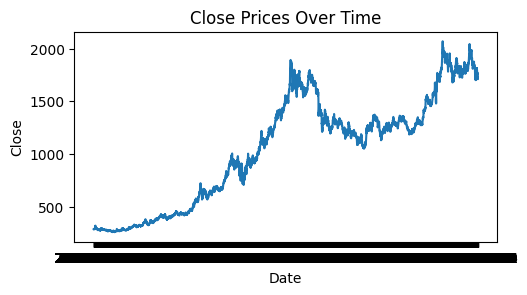

In [28]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
#line plot for close prices over time
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.lineplot(x='Date',y='Close',data=df)
plt.title("Close Prices Over Time")

Text(0.5, 1.0, 'Volume Distribution')

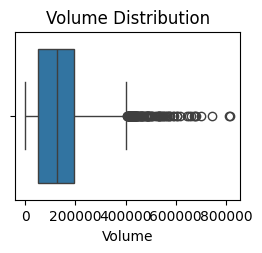

In [29]:
#Boxplot for volume
plt.subplot(2,2,2)
sns.boxplot(x='Volume',data=df)
plt.title("Volume Distribution")

Text(0.5, 1.0, 'Candlestick Plot')

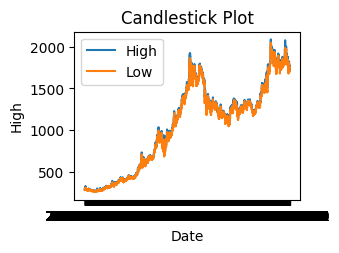

In [30]:
#Candlestick plot
plt.subplot(2,2,3)
sns.lineplot(x='Date',y='High',data=df,label='High')
sns.lineplot(x='Date',y='Low',data=df,label='Low')
plt.fill_between(df["Date"],df['Low'],df['High'],alpha=0.2)
plt.title('Candlestick Plot')

Text(0.5, 1.0, 'Daily Price Changes')

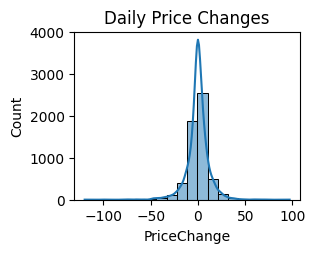

In [31]:
# Histogram of daily price changes
plt.subplot(2, 2, 4)
df['PriceChange'] = df['Close'] - df['Open']
sns.histplot(df['PriceChange'], bins=20, kde=True)
plt.title('Daily Price Changes')

In [32]:
#Z-score based outlier detection
z_score=np.abs((df['Close']-df['Close'].mean())/df['Close'].std())
outliers=df[z_score>2]
outliers

,Date,Open,High,Low,Close,Volume,Currency,PriceChange


In [33]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X=df[['Open','High','Low','Volume']]
y=df['Close']
#Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#linear regression model
model=LinearRegression()

In [34]:
cv_scores=cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
cv_scores

array([-17.4196501 , -23.23165016, -21.67692293, -21.23560584,
       -25.78271598])

In [35]:
np.mean(cv_scores)

np.float64(-21.86930899963022)

In [37]:
# Train the model on the full training set
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse

21.987005900774214

In [38]:
# Outlier Detection
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['Close'] < (Q1 - 1.5 * IQR)) | (df['Close'] > (Q3 + 1.5 * IQR))
outliers

,Close
0,False
1,False
2,False
3,False
4,False
...,...
5698,False
5699,False
5700,False
5701,False


In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)
# Machine Learning Model (Random Forest Regressor)
modelr = RandomForestRegressor(random_state=42)

In [41]:
# Cross-validation
cv_scores = cross_val_score(modelr, X_standardized, y, cv=5, scoring='neg_mean_squared_error')
rmse_cv_scores = [abs(score)**0.5 for score in cv_scores]
rmse_cv_scores

[np.float64(89.91570597858117),
 np.float64(116.13840902673122),
 np.float64(8.79554386194193),
 np.float64(6.077262574692153),
 np.float64(26.233271290950306)]

In [42]:
sum(rmse_cv_scores)/len(rmse_cv_scores)

np.float64(49.432038546579356)

In [43]:
# Training the model on the training set
modelr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
# Predictions on the testing set
y_pred = modelr.predict(X_test)

In [47]:
# Evaluation
from sklearn.metrics import root_mean_squared_error # Import the correct function
rmse = root_mean_squared_error(y_test, y_pred) # Use root_mean_squared_error without the 'squared' argument
rmse

6.332106064778143